In [1]:
!gdown --id 1FdydikIZfRaENz3CLaZT24Deyc4KvZO3

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1FdydikIZfRaENz3CLaZT24Deyc4KvZO3
To: /content/advertising.csv
100% 4.06k/4.06k [00:00<00:00, 12.2MB/s]


## Explore The Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data_filepath = 'advertising.csv'

In [21]:
def get_collumn(data, index):
    data_array = np.array(data)
    return data_array[:, index].tolist()

def prepare_data(file_path):
    data = np.genfromtxt(data_filepath, delimiter=',', skip_header=True).tolist()
    N = len(data)
    tv_data = get_collumn(data, 0)
    radio_data = get_collumn(data, 1)
    newspaper_data = get_collumn(data, 2)
    sales_data = get_collumn(data, 3)
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data
    return X, y


In [49]:
X_train, y_train = prepare_data(data_filepath)

In [50]:
# Question 1
list = [sum(X_train[0][:5]), sum(X_train[1][:5]), sum(X_train[2][:5]), sum(y_train[:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


## Linear Regression implementation by Scratch

In [51]:
import random
def initialize_params1():
    w1 = random.gauss(mu=0.0, sigma =0.01)
    w2 = random.gauss(mu=0.0, sigma =0.01)
    w3 = random.gauss(mu=0.0, sigma =0.01)
    b = 0
    return w1, w2, w3, b

# Using for exercise
w1 , w2 , w3 , b = (0.016992259082509283 , 0.0070783670518262355 , -0.002307860847821344 , 0)

In [52]:
def predict (x1 , x2 , x3 , w1 , w2 , w3 , b):
    result = w1 * x1 + w2 * x2 + w3 * x3 + b
    return result


In [53]:
# question 2
y_hat = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y_hat)

1.0


In [70]:
def compute_loss_mse(y_hat, y):
    loss = (y_hat - y) ** 2
    return loss
def compute_loss_mae(y_hat, y):
    loss = abs(y_hat - y)
    return loss

In [71]:
# question 3
l = compute_loss_mse(y_hat=1, y=0.5)
print(l)

0.25


In [56]:
def compute_gradient_wi(xi, y, y_hat):
    dl_wi = 2 * (y_hat - y) * xi
    return dl_wi

def compute_gradient_b(y, y_hat):
    dl_b = 2 * (y_hat - y)
    return dl_b

In [57]:
# question 4
g_wi = compute_gradient_wi(xi=1, y=1, y_hat=0.5)
print(g_wi)

-1.0


In [58]:
# question 5
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [59]:
def update_weight_wi(wi, dl_wi, lr):
    w_new = wi - lr * dl_wi
    return w_new

def update_weight_b(b, dl_b, lr):
    b_new = b - lr * dl_b
    return b_new

In [60]:
# question 6
after_wi = update_weight_wi(wi=1.0, dl_wi=-0.5, lr=1e-5)
print(after_wi)

1.000005


In [61]:
# question 7
after_b = update_weight_b(b=0.5, dl_b=-1.0, lr=1e-5)
print(after_b)

0.50001


In [72]:
# Using for exercise
def initialize_params():
    w1 , w2 , w3 , b = (0.016992259082509283 , 0.0070783670518262355 , -0.002307860847821344 , 0)
    return w1, w2, w3, b

def implement_linear_regression(X_data, y_data, lr=1e-5, epochs_max=50, compute_loss=compute_loss_mse):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)

    for epoch in range(epochs_max):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            loss = compute_loss(y_hat, y)
            losses.append(loss)

            dl_w1 = compute_gradient_wi(x1, y, y_hat)
            dl_w2 = compute_gradient_wi(x2, y, y_hat)
            dl_w3 = compute_gradient_wi(x3, y, y_hat)
            dl_b = compute_gradient_b(y, y_hat)

            w1 = update_weight_wi(w1, dl_w1, lr)
            w2 = update_weight_wi(w2, dl_w2, lr)
            w3 = update_weight_wi(w3, dl_w3, lr)
            b = update_weight_b(b, dl_b, lr)

    return w1, w2, w3, b, losses

## Training

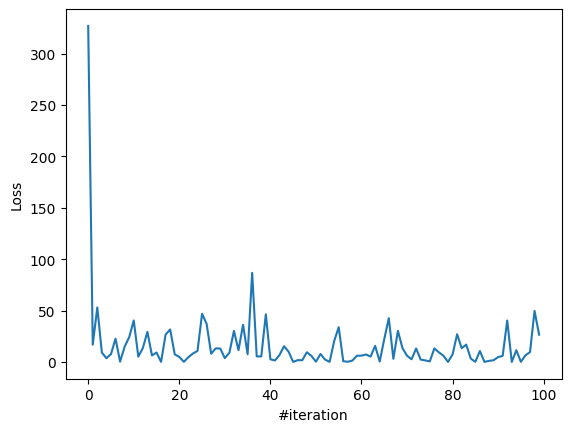

In [65]:
w1, w2, w3, b, losses = implement_linear_regression(X_train, y_train)
plt.plot(losses[:100])
plt.xlabel('#iteration')
plt.ylabel('Loss')
plt.show()


In [66]:
# question 8
print(w1, w2, w3)

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [69]:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3
X,y = prepare_data('advertising.csv')
(w1 ,w2 ,w3 ,b, losses) = implement_linear_regression(X, y)
sales = predict (tv, radio, newspaper, w1 , w2 , w3 , b)
print (f'predicted sales is { sales }')

predicted sales is 8.176413319549823


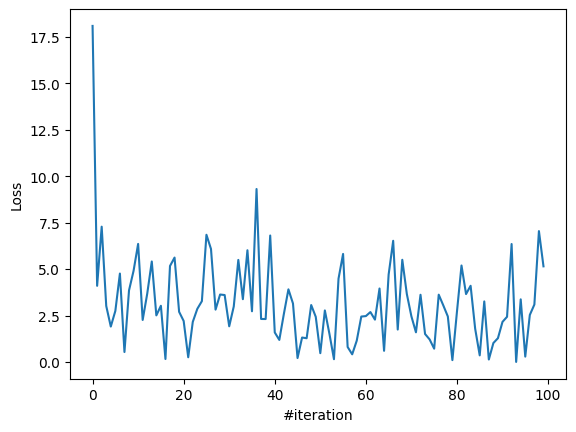

In [73]:
# question 10
X,y = prepare_data('advertising.csv')
w1, w2, w3, b, losses = implement_linear_regression(X, y, compute_loss=compute_loss_mae)
plt.plot(losses[:100])
plt.xlabel('#iteration')
plt.ylabel('Loss')
plt.show()

## Training - Batch N samples

In [93]:
# Using for exercise
def initialize_params():
    w1 , w2 , w3 , b = (0.016992259082509283 , 0.0070783670518262355 , -0.002307860847821344 , 0)
    return w1, w2, w3, b

def implement_linear_regression_nsamples(X_data, y_data, lr=1e-5, epochs_max=50, compute_loss=compute_loss_mse):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)

    for epoch in range(epochs_max):
        loss_total = 0
        dw1_total = 0
        dw2_total = 0
        dw3_total = 0
        db_total = 0
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            loss = compute_loss(y_hat, y)
            loss_total += loss

            dl_w1 = compute_gradient_wi(x1, y, y_hat)
            dl_w2 = compute_gradient_wi(x2, y, y_hat)
            dl_w3 = compute_gradient_wi(x3, y, y_hat)
            dl_b = compute_gradient_b(y, y_hat)

            dw1_total += dl_w1
            dw2_total += dl_w2
            dw3_total += dl_w3
            db_total += dl_b

        w1 = update_weight_wi(w1, dw1_total/N, lr)
        w2 = update_weight_wi(w2, dw2_total/N, lr)
        w3 = update_weight_wi(w3, dw3_total/N, lr)
        b = update_weight_b(b, db_total/N, lr)

        losses.append(loss_total/N)


    return w1, w2, w3, b, losses

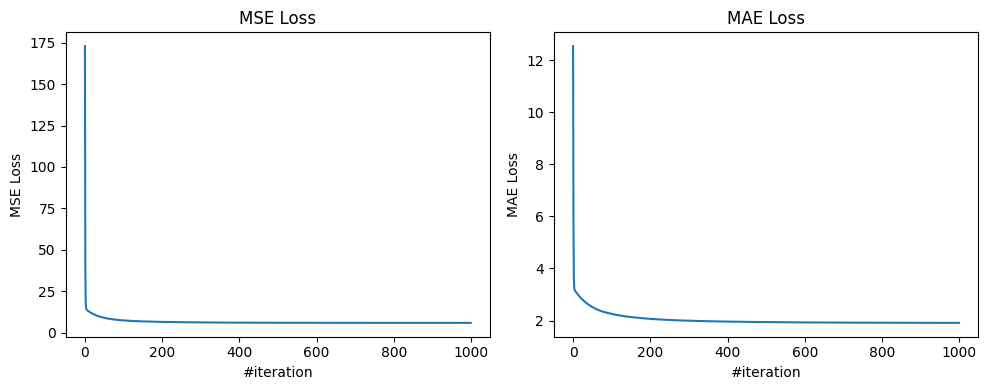

In [94]:
# question 10
X,y = prepare_data('advertising.csv')
w1, w2, w3, b, losses = implement_linear_regression_nsamples(X, y, epochs_max=1000, compute_loss=compute_loss_mse)
w11, w21, w31, b1, losses1 = implement_linear_regression_nsamples(X, y, epochs_max=1000, compute_loss=compute_loss_mae)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].plot(losses)
axes[0].set_xlabel('#iteration')
axes[0].set_ylabel('MSE Loss')
axes[0].set_title('MSE Loss')

axes[1].plot(losses1)
axes[1].set_xlabel('#iteration')
axes[1].set_ylabel('MAE Loss')
axes[1].set_title('MAE Loss')

plt.tight_layout()
plt.show()

In [95]:
#question 11
print(w1, w2, w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


# Implementation with numpy

In [98]:
def get_collumn_(data, index):
    data_array = np.array(data)
    return data_array[:, index].tolist()

def prepare_data_(file_path):
    data = np.genfromtxt(data_filepath, delimiter=',', skip_header=True).tolist()
    N = len(data)
    tv_data = get_collumn(data, 0)
    radio_data = get_collumn(data, 1)
    newspaper_data = get_collumn(data, 2)
    sales_data = get_collumn(data, 3)
    X = [[x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    return X, y
import random
def initialize_params_():
    w1 = random.gauss(mu=0.0, sigma =0.01)
    w2 = random.gauss(mu=0.0, sigma =0.01)
    w3 = random.gauss(mu=0.0, sigma =0.01)
    b = 0
    return [0, -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]
    # return b, w1, w2, w3

def predict_(X_feature, weight):
    result = np.dot(X_feature, weight)
    return result
def compute_loss_mae_(y_hat, y):
    loss = abs(y_hat - y)
    return loss
def compute_loss_mse_(y_hat, y):
    loss = (y_hat - y) ** 2
    return loss

def compute_gradient_(X_feature, y, y_hat):
    dl_wi = 2 * (y_hat - y) * X_feature
    return dl_wi

def update_weight_(wi, dl_wi, lr):
    w_new = wi - lr * dl_wi
    return w_new


In [99]:
def implement_linear_regression_numpy(X_data, y_data, lr=1e-5, epochs_max=50, compute_loss=compute_loss_mse):
    losses = []
    w = initialize_params_()
    N = len(y_data)
    for epoch in range(epochs_max):
        for i in range(N):
            features_i = X_data[i]
            y = y_data[i]
            y_hat = predict_(features_i, w)
            loss = compute_loss(y_hat, y)
            losses.append(loss)
            dl_w = compute_gradient_(features_i, y, y_hat)
            w = update_weight_(w, dl_w, lr)
    return w, losses


In [101]:
X, y = prepare_data_(data_filepath)
X = np.array(X)
y = np.array(y)
bias = np.ones(len(y))
X = np.column_stack((bias, X))
w, losses = implement_linear_regression_numpy(X, y, epochs_max=1000, compute_loss=compute_loss_mse)
print(w)

[2.11378449 0.065719   0.1376771  0.00789136]


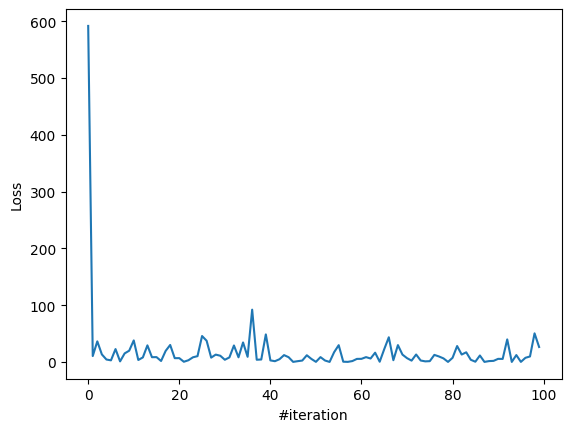

In [102]:
plt.plot(losses[:100])
plt.xlabel('#iteration')
plt.ylabel('Loss')
plt.show()

In [103]:
# question 12
print(losses[9999])

31.339223408109948
